In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime

In [3]:
#df = pd.read_csv('open-meteo-59.30N18.16E24m.csv', skiprows=2)

In [4]:
df = pd.read_csv('weather.csv')
df.head(3)

,Unnamed: 0,date,temperature_2m,rain,snowfall,wind_speed_10m,year,month,day
0,0,2023-01-01 00:00:00,2.365,0.0,0.0,14.830076,2023,1,1
1,1,2023-01-01 01:00:00,1.615,0.0,0.0,11.183201,2023,1,1
2,2,2023-01-01 02:00:00,0.765,0.0,0.0,10.440001,2023,1,1


In [5]:
# which month is the hottest month in 2023?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8016 entries, 0 to 8015
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8016 non-null   int64  
 1   date            8016 non-null   object 
 2   temperature_2m  8016 non-null   float64
 3   rain            8016 non-null   float64
 4   snowfall        8016 non-null   float64
 5   wind_speed_10m  8016 non-null   float64
 6   year            8016 non-null   int64  
 7   month           8016 non-null   int64  
 8   day             8016 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 563.8+ KB


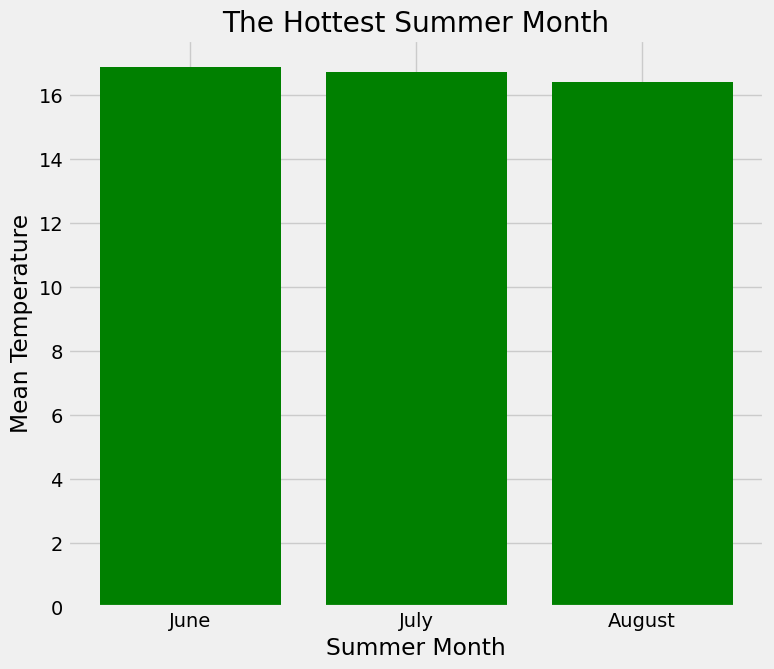

In [68]:
# 1. Which was the hottest summer month?

summer_months = [6, 7, 8]

# Filter data for the summer months
summer_data_2023 = df[df['month'].isin(summer_months)]

# Group by month and calculate the mean temperature for each month
monthly_mean_temperature = summer_data_2023.groupby('month')['temperature_2m'].mean()

# Define month names
month_names = ['June', 'July', 'August']

# Plot the bar chart with month names on the x-axis
plt.figure(figsize=(8, 7))
plt.bar(month_names, monthly_mean_temperature, color = 'green',)
plt.xlabel('Summer Month')
plt.ylabel('Mean Temperature')
plt.title('The Hottest Summer Month')
plt.show()


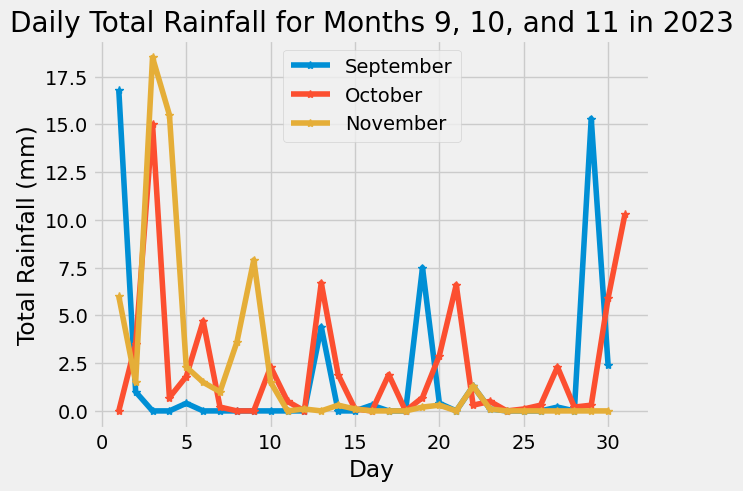

In [69]:
# 2.plot a linchart for the sum of Rainfall each day in months (9, 10 11)

# Filter data for months 9, 10, 11

data = df[df['month'].isin([9, 10, 11])]

# Group by day and calculate the sum of rain for each day
daily_total_rain = data.groupby(['month', 'day'])['rain'].sum()

# Flatten the multi-index for plotting
daily_total_rain = daily_total_rain.reset_index()

# Filter data for each month
rain_september = daily_total_rain[daily_total_rain['month'] == 9]
rain_october = daily_total_rain[daily_total_rain['month'] == 10]
rain_november = daily_total_rain[daily_total_rain['month'] == 11]

# Plot the line chart
plt.plot(rain_september['day'], rain_september['rain'], label='September', marker= '*')
plt.plot(rain_october['day'], rain_october['rain'], label='October', marker = '*')
plt.plot(rain_november['day'], rain_november['rain'], label='November', marker= '*')

plt.xlabel('Day')
plt.ylabel('Total Rainfall (mm)')
plt.title('Daily Total Rainfall for Months 9, 10, and 11 in 2023')
plt.legend()
plt.style.use('fivethirtyeight')
plt.show()




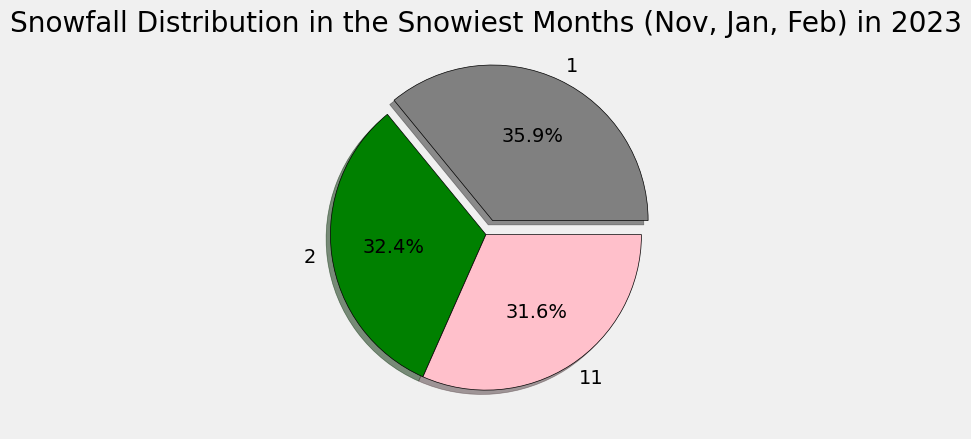

In [70]:
# 3.plot a piechart for the snowiest month (November, January, February)

# Filter data for the months November, January, and February
data_snowiest_months = df[df['month'].isin([11, 1, 2])]

# Group by month and calculate the sum of snowfall for each month
monthly_total_snowfall = data_snowiest_months.groupby('month')['snowfall'].sum()

# Find the snowiest month
snowiest_month = monthly_total_snowfall.idxmax()

# Plot the pie chart
colors= ['gray', 'green', 'pink']
explode = [0.1, 0, 0]
plt.pie(monthly_total_snowfall, labels=monthly_total_snowfall.index, autopct='%1.1f%%',colors= colors,wedgeprops = {'edgecolor': 'black'}, explode= explode, shadow=True)
plt.title('Snowfall Distribution in the Snowiest Months (Nov, Jan, Feb) in 2023')
plt.show()